<a href="https://www.kaggle.com/code/julioam/online-payments-fraud-detection-analysis?scriptVersionId=102807383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
#import the data
#drop column isFlaggedFraud since there is no explanation about it and I don't know the usage of this variable
df = pd.read_csv('../input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
df.drop('isFlaggedFraud', axis=1, inplace=True)

In [3]:
#check the head of data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [5]:
#some statistic from dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
#check the missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

The data has no missing values

Change column name from oldbalanceOrg to newbalanceOrig

In [7]:
df.rename(columns={'oldbalanceOrg' : 'oldbalanceOrig'}, inplace=True)

## Exploratory Data Analysis

1. step

Frequency of step where 1 step equals 1 hour

In [8]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

There are 743 steps and all steps has occurences more than 1. 

2. type

Frequency of online transaction type

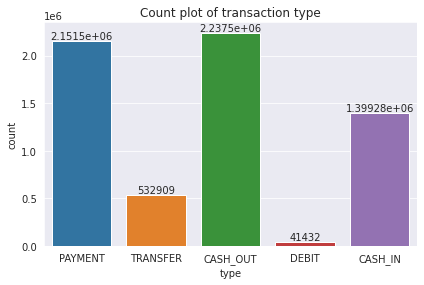

In [9]:
fig = plt.figure()
ax = sns.countplot(x='type', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title('Count plot of transaction type')
plt.show(fig)

The most transaction type is CASH_OUT with slight difference than PAYMENT

3. amount

Distribution of transaction amount

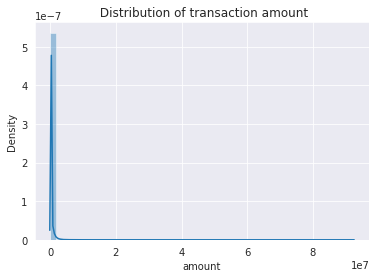

In [10]:
fig = plt.figure()
sns.distplot(df['amount'])
plt.title(' Distribution of transaction amount')
plt.show(fig)

The distribution of amount is left skewed

4. nameOrig

Frequency of customer name starting the transaction

In [11]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

5. oldbalanceOrg

Distribution of balance before the transaction

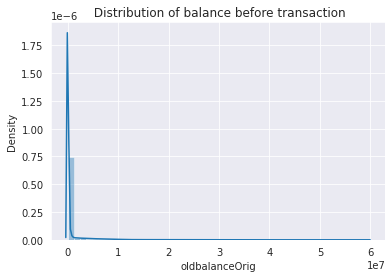

In [12]:
fig = plt.figure()
sns.distplot(df['oldbalanceOrig'])
plt.title(' Distribution of balance before transaction')
plt.show(fig)

The distribution of oldbalanceOrg left skewed

6. newbalanceOrig

Distribution of balance after the transaction

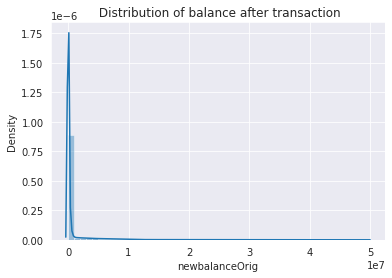

In [13]:
fig = plt.figure()
sns.distplot(df['newbalanceOrig'])
plt.title(' Distribution of balance after transaction')
plt.show(fig)

The distribution of newbalanceOrig i s left skewed

7. nameDest

Frequency of transaction recipient 

In [14]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

There are more than 2 million recipients. Some recipients appear more than once and some recipients appear only once

8. oldbalanceDest

Distribution of initial balance of recipient before the transaction

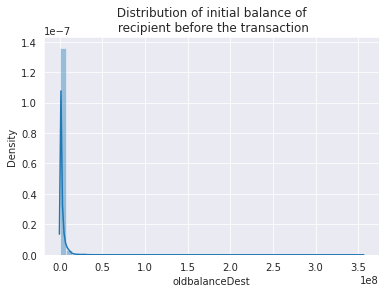

In [15]:
fig = plt.figure()
sns.distplot(df['oldbalanceDest'])
plt.title(' Distribution of initial balance of \n recipient before the transaction')
plt.show(fig)

The distribution of oldbalanceDest is left skewed

9. newbalanceDest

Distribution of the new balance of recipient after the transaction

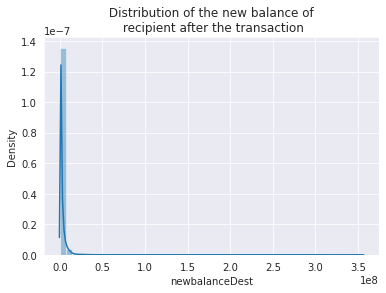

In [16]:
fig = plt.figure()
sns.distplot(df['newbalanceDest'])
plt.title(' Distribution of the new balance of \n recipient after the transaction')
plt.show(fig)

The distribution of newbalanceDest is left skewed

10. isFraud

Frequency of isFraud variable

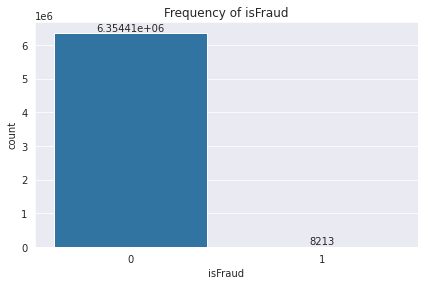

In [17]:
fig = plt.figure()
ax = sns.countplot(x='isFraud', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.title('Frequency of isFraud')
plt.show(fig)

There is a huge difference between "0" and "1" data which means there is imbalance in the dataset

Correlation 

Correlation of variables in df

<AxesSubplot:>

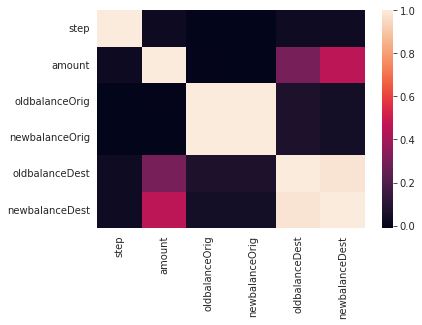

In [18]:
sns.heatmap(df.loc[:, df.columns != 'isFraud'].corr())

oldbalanceOrg and newbalanceOrg has high correlation

oldbalanceDest and newbalanceDest has high correlation


Frequency of transaction type and isFraud

<AxesSubplot:xlabel='type', ylabel='count'>

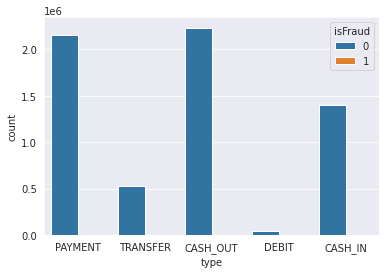

In [19]:
sns.countplot(x='type', data=df, hue='isFraud')

All type of transaction dominated by "0"

## Modelling

In this modelling I will use step, amount, odlbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

In [20]:
X = df[['step','type','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = df['isFraud']

In [21]:
X = pd.get_dummies(data=X, prefix='type')
X.head()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [22]:
#split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.999711596795031


In [25]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.90      0.88      0.89      1641

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



Seems the model is good at classifyng the fraud transaction